In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("dark_background")

In [2]:
data = pd.read_excel("E:\Online Certifications Courses & Practices\Practices Data Science\PowerBI Practices\VoiceCallQuality_Telecom 2018\Telecom_analysis_IND.xlsx")

In [3]:
data.shape

(95317, 8)

In [4]:
data.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95317 entries, 0 to 95316
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Operator                   95317 non-null  object 
 1   Indoor_Outdoor_Travelling  63336 non-null  object 
 2   Network Type               95317 non-null  object 
 3   Rating                     95317 non-null  int64  
 4   Call Drop Category         95317 non-null  object 
 5   Latitude                   95317 non-null  float64
 6   Longitude                  95317 non-null  float64
 7   State Name                 70669 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 5.8+ MB


In [6]:
data.describe()

,Rating,Latitude,Longitude
count,95317.000000,95317.000000,95317.000000
mean,3.465499,15.221703,57.940569
std,1.451786,10.761106,35.054858
min,1.000000,-1.000000,-73.982452
25%,2.000000,-1.000000,-1.000000
50%,4.000000,18.517141,76.660720
75%,5.000000,23.161592,78.476857
max,5.000000,40.756409,103.984169


## Data Cleaning & Processing

data.isnull().sum()

In [7]:
data.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,3G,5,Satisfactory,28.422966,76.912324,Haryana
1,RJio,Indoor,4G,4,Satisfactory,11.158358,77.301897,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,28.422931,76.912253,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,28.422947,76.912260,Haryana
4,RJio,Indoor,4G,5,Satisfactory,25.625990,85.094294,Bihar


In [8]:
df=data

In [9]:
df.drop(["Latitude", "Longitude"], axis=1, inplace=True)
df.head()

,Operator,Indoor_Outdoor_Travelling,Network Type,Rating,Call Drop Category,State Name
0,Airtel,Indoor,3G,5,Satisfactory,Haryana
1,RJio,Indoor,4G,4,Satisfactory,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,Haryana
4,RJio,Indoor,4G,5,Satisfactory,Bihar


In [10]:
df.isnull().sum()

Operator                         0
Indoor_Outdoor_Travelling    31981
Network Type                     0
Rating                           0
Call Drop Category               0
State Name                   24648
dtype: int64

In [11]:
df.rename(columns={'Indoor_Outdoor_Travelling':'Environment'}, inplace=True)

In [12]:
data.head()

,Operator,Environment,Network Type,Rating,Call Drop Category,State Name
0,Airtel,Indoor,3G,5,Satisfactory,Haryana
1,RJio,Indoor,4G,4,Satisfactory,Tamil Nadu
2,Airtel,Outdoor,3G,5,Satisfactory,Haryana
3,Airtel,Travelling,3G,5,Satisfactory,Haryana
4,RJio,Indoor,4G,5,Satisfactory,Bihar


In [13]:
df['Environment'].unique()

array(['Indoor', 'Outdoor', 'Travelling', nan], dtype=object)

In [14]:
## Indoor = 0
## Outdoor = 1
## Travelling = 2

df.loc[df["Environment"] == 'Indoor', 'Environment',] = 0
df.loc[df["Environment"] == 'Outdoor', 'Environment',] = 1
df.loc[df["Environment"] == 'Travelling', 'Environment',] = 2

In [15]:
def Env (value):
    value = float(value)
    if (value < 1):
        return 0
    else:
        return float (value)
    
df["Environment"] = df["Environment"].apply(Env)

In [16]:
df.head()

,Operator,Environment,Network Type,Rating,Call Drop Category,State Name
0,Airtel,0.0,3G,5,Satisfactory,Haryana
1,RJio,0.0,4G,4,Satisfactory,Tamil Nadu
2,Airtel,1.0,3G,5,Satisfactory,Haryana
3,Airtel,2.0,3G,5,Satisfactory,Haryana
4,RJio,0.0,4G,5,Satisfactory,Bihar


In [17]:
df['Environment'].unique()

array([ 0.,  1.,  2., nan])

In [18]:
df["Environment"].fillna(df["Environment"].mean(), inplace=True)
df.isnull().sum()

Operator                  0
Environment               0
Network Type              0
Rating                    0
Call Drop Category        0
State Name            24648
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(70669, 6)

In [21]:
df.isnull().sum()

Operator              0
Environment           0
Network Type          0
Rating                0
Call Drop Category    0
State Name            0
dtype: int64

In [22]:
df.head()

,Operator,Environment,Network Type,Rating,Call Drop Category,State Name
0,Airtel,0.0,3G,5,Satisfactory,Haryana
1,RJio,0.0,4G,4,Satisfactory,Tamil Nadu
2,Airtel,1.0,3G,5,Satisfactory,Haryana
3,Airtel,2.0,3G,5,Satisfactory,Haryana
4,RJio,0.0,4G,5,Satisfactory,Bihar


In [23]:
df["Operator"].value_counts()

RJio        29135
Airtel      17001
Vodafone     9721
BSNL         7881
Idea         6308
Tata          232
RComm         218
MTNL          113
Telenor        33
Other          27
Name: Operator, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Operator', ylabel='count'>

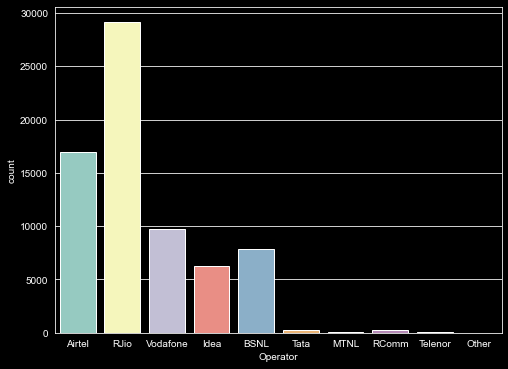

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(df["Operator"])

In [25]:
def Net (op):

    if ('Tata' in op):
        return 'Others'
    if ('MTNL' in op):
        return 'Others'
    if ('RComm' in op):
        return 'Others'
    if ('Telenor' in op):
        return 'Others'
    if ('Other' in op):
        return 'Others'

    else:
        return op

In [26]:
df["Operator"] = df["Operator"].apply(Net)

In [27]:
df["Operator"].value_counts()

RJio        29135
Airtel      17001
Vodafone     9721
BSNL         7881
Idea         6308
Others        623
Name: Operator, dtype: int64

## Data Analyzing

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Operator', ylabel='count'>

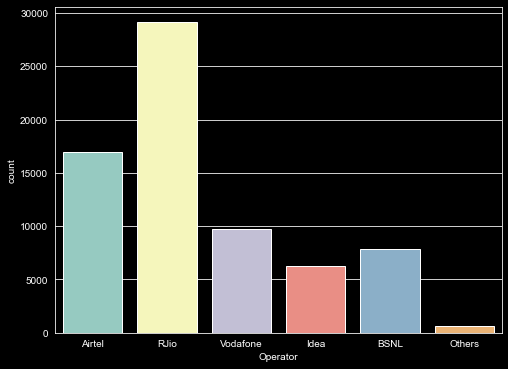

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(df["Operator"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Environment', ylabel='count'>

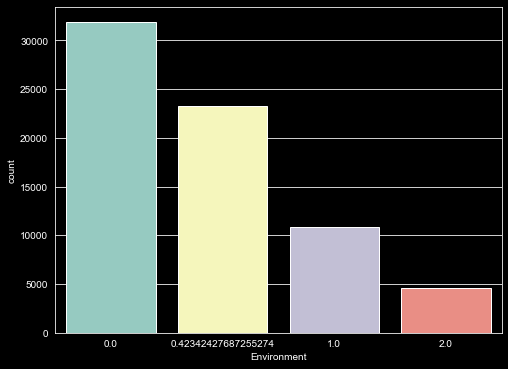

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(df["Environment"])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Network Type', ylabel='count'>

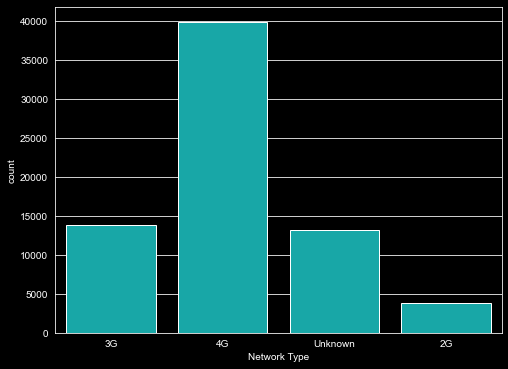

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(df["Network Type"], color="c")

In [31]:
df["Network Type"].value_counts()

4G         39807
3G         13843
Unknown    13174
2G          3845
Name: Network Type, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Operator', ylabel='count'>

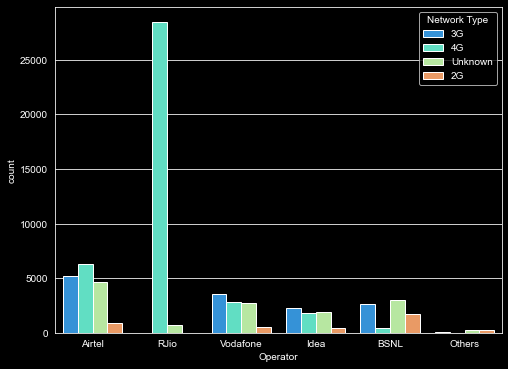

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot('Operator', data=df, hue='Network Type',palette='rainbow')

<AxesSubplot:xlabel='Operator', ylabel='Rating'>

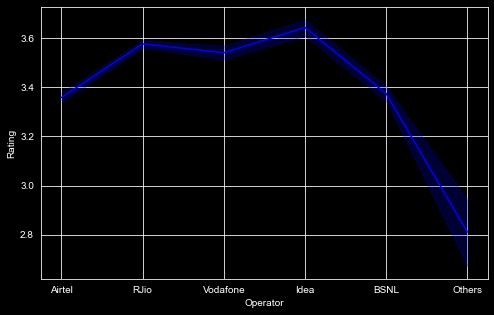

In [44]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='Operator', y='Rating', data=df, color="b")

<AxesSubplot:xlabel='Operator', ylabel='Rating'>

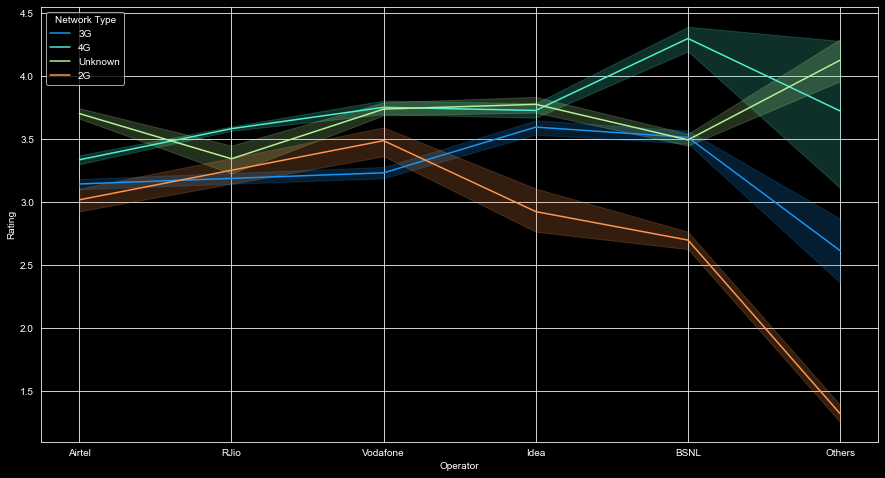

In [34]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Operator', y='Rating', hue='Network Type', data=df, palette='rainbow')

<AxesSubplot:xlabel='Call Drop Category', ylabel='Rating'>

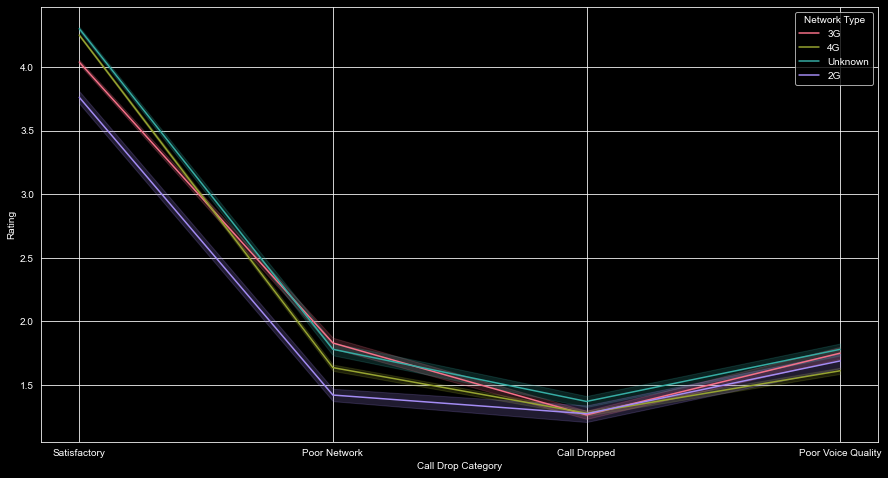

In [46]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='Call Drop Category', y='Rating', hue='Network Type', data=df, palette='husl')

<AxesSubplot:xlabel='Call Drop Category', ylabel='Rating'>

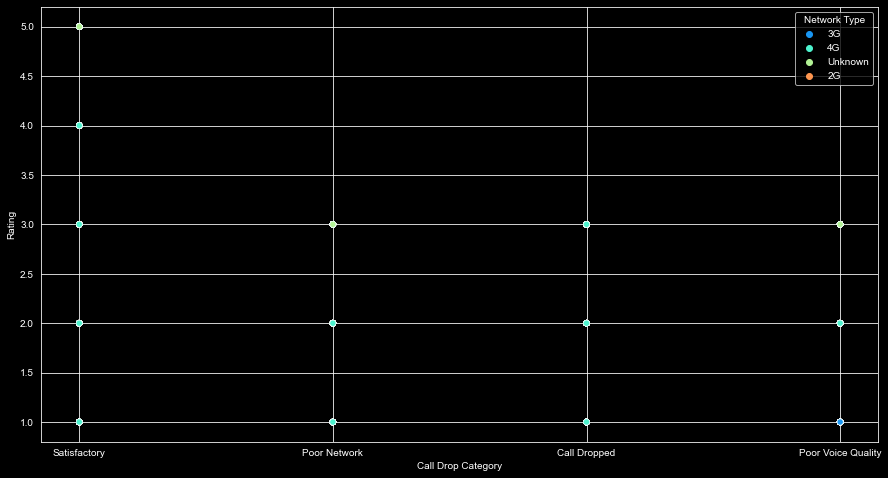

In [50]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='Call Drop Category', y='Rating', hue='Network Type', data=df, palette='rainbow')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Call Drop Category', ylabel='count'>

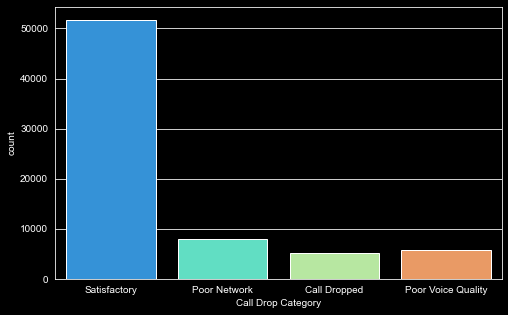

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(df["Call Drop Category"], palette='rainbow')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Call Drop Category', ylabel='count'>

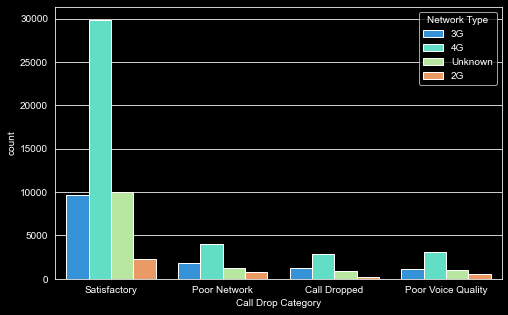

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(df["Call Drop Category"], palette='rainbow', hue=df['Network Type'])

In [37]:
df['State Name'].unique()

array(['Haryana', 'Tamil Nadu', 'Bihar', 'Andhra Pradesh', 'Maharashtra',
       'Rajasthan', 'Odisha', 'Uttar Pradesh', 'Karnataka', 'NCT',
       'West Bengal', 'Madhya Pradesh', 'Uttarakhand', 'Punjab',
       'Gujarat', 'Nagaland', 'Jharkhand', 'Telangana', 'Kerala', 'Assam',
       'Chhattisgarh', 'Himachal Pradesh', 'Chhukha', 'Pondicherry',
       'Goa', 'Chandigarh', 'Kashmir', 'Eastern Region', 'Sikkim',
       'Meghalaya', 'Manipur', 'Arunachal Pradesh', 'Adis Abeba',
       'Dadra and Nagar Haveli', 'Samchi', 'Tripura', 'Central Region',
       'Samdrup Jongkhar', 'New York', 'Andaman and Nicobar Islands'],
      dtype=object)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Haryana'),
  Text(1, 0, 'Tamil Nadu'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Andhra Pradesh'),
  Text(4, 0, 'Maharashtra'),
  Text(5, 0, 'Rajasthan'),
  Text(6, 0, 'Odisha'),
  Text(7, 0, 'Uttar Pradesh'),
  Text(8, 0, 'Karnataka'),
  Text(9, 0, 'NCT'),
  Text(10, 0, 'West Bengal'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Uttarakhand'),
  Text(13, 0, 'Punjab'),
  Text(14, 0, 'Gujarat'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Jharkhand'),
  Text(17, 0, 'Telangana'),
  Text(18, 0, 'Kerala'),
  Text(19, 0, 'Assam'),
  Text(20, 0, 'Chhattisgarh'),
  Text(21, 0, 'Himachal Pradesh'),
  Text(22, 0, 'Chhukha'),
  Text(23, 0, 'Pondicherry'),
  Text(24, 0, 'Goa'),
  Text(25, 0, 'Chandigarh'),
  Text(26, 0, 'Kashmir'),
  Text(27, 0, 'Eastern Region'),
  Text(28, 0, 'Sikkim'),
  Text(29, 0, 

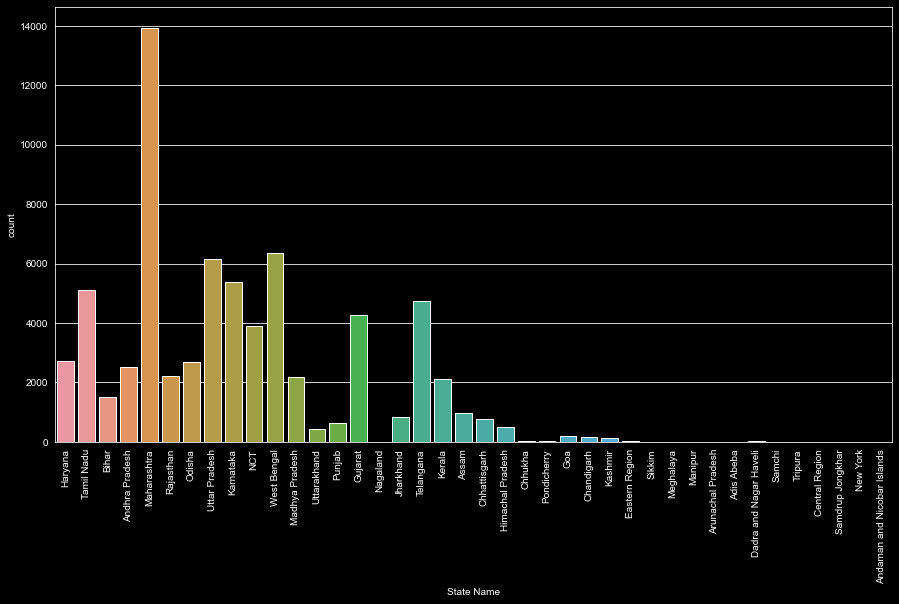

In [38]:
plt.figure(figsize=(15, 8))
sns.countplot(df["State Name"])
plt.xticks(rotation=90)

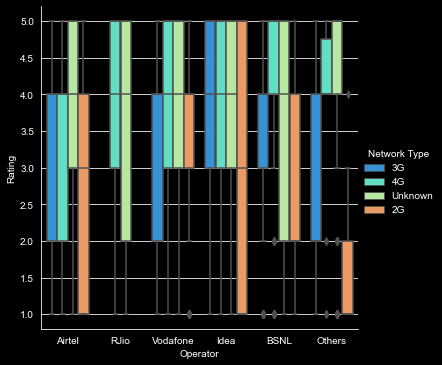

In [39]:
sns.catplot(x="Operator", y="Rating", hue="Network Type", kind="box", data=df, palette='rainbow')

In [40]:
df["Network Type"].value_counts()

4G         39807
3G         13843
Unknown    13174
2G          3845
Name: Network Type, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Network Type', ylabel='count'>

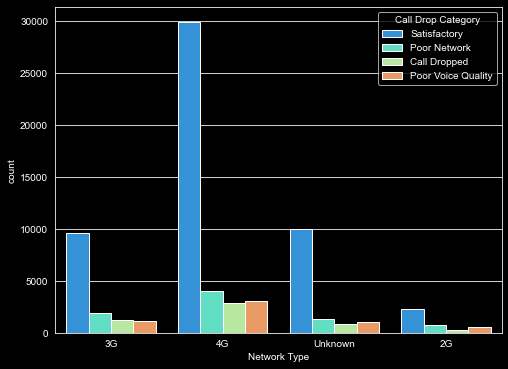

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot('Network Type', data=df, hue='Call Drop Category',palette='rainbow')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Operator', ylabel='count'>

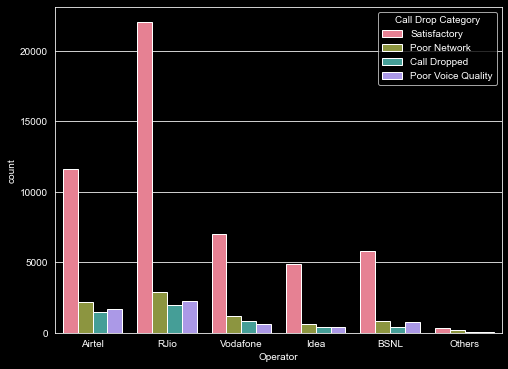

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot("Operator", data=df, hue= 'Call Drop Category', palette="husl")